# Искусственные нейронные сети

1.1. **Общие сведения о нейронных сетях**
Нейронные сети (Neural Networks) – это модели биологических нейронных сетей мозга, в которых нейроны имитируются относительно простыми, часто однотипными, элементами (искусственными нейронами).

Нейронные сети:

•    принимают некоторые входные данные (входной сигнал),

•    выполняют некоторые вычисления и

•    выдают выходные данные (выходной сигнал).

Нейронная сеть может быть представлена направленным графом с взвешенными связями, в котором искусственные нейроны являются вершинами, а синаптические связи – дугами:

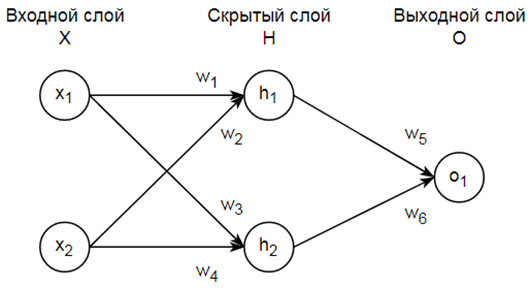

Нейроны объединяются в слои.
Нейронная сеть состоит из трех типов слоев нейронов:

•    входного слоя X,

•    некоторого числа скрытых слоев Hi,

•    выходного слоя O.

В нашем примере нейронная сеть содержит только один скрытый слой H.

1.2. **Персептрон**

Персептрон (Персептрон Розенблата) (Perceptron, Rozenblatt perceptron) – простейшая форма нейронной сети, предназначенная для классификации линейно-резделимых (linearly-separable) сигналов.

Персептрон содержит:

•    входной слой,

•    выходной слой, содержащий:

 -   нейрон, имеющий настраиваемые:

  веса (wi),

  пороговое значение.

Персептрон, построенный на одном нейроне ограничен выполнением задачи разделения только двух классов.

Если увеличить размерность выходного слоя, включая в него дополнительные нейроны, можно решать задачи классификации на большее число классов.

Пример персептрона:

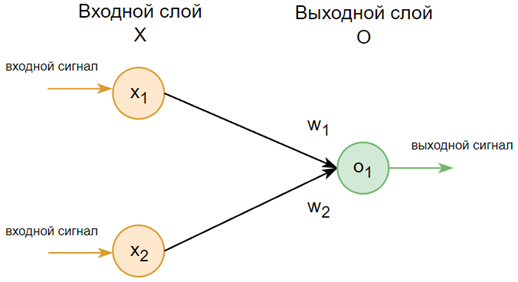

1.3. **Многослойный персептрон**

Многослойный персептрон (Multilayer perceptron, MLP) – модель нейронной сети, имеющая:

•    входной слой,

•    один или несколько скрытых слоев,

•    выходной слой.

Входной сигнал распространяется по сети в прямом направлении, от слоя к слою.

Пример многослойного персептрона:

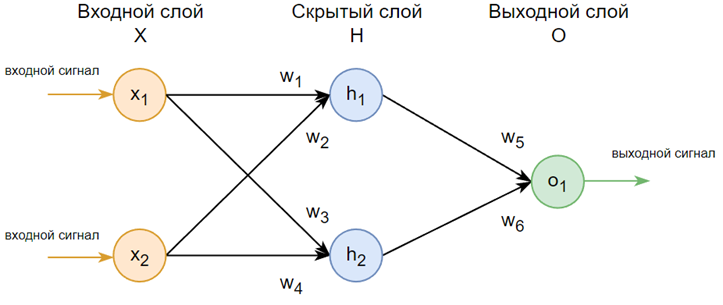

Многослойный персептрон способен решать более сложные задачи, по сравнению с однослойным персептроном.

Использование смещения (bias term)

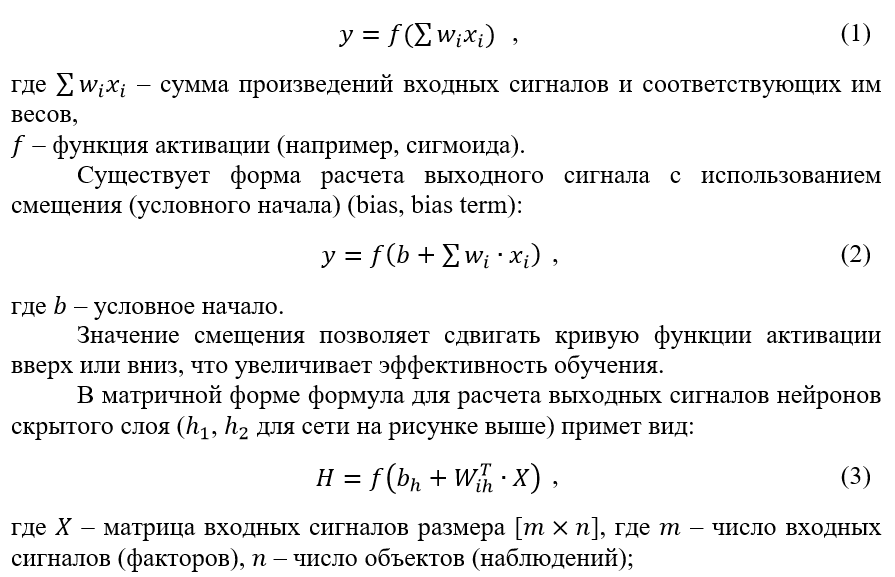

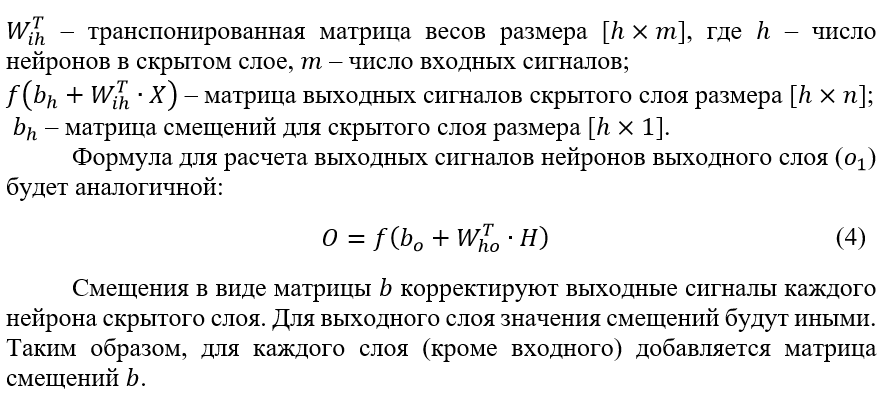

Модель персептрона со смещением  примет следующий вид:

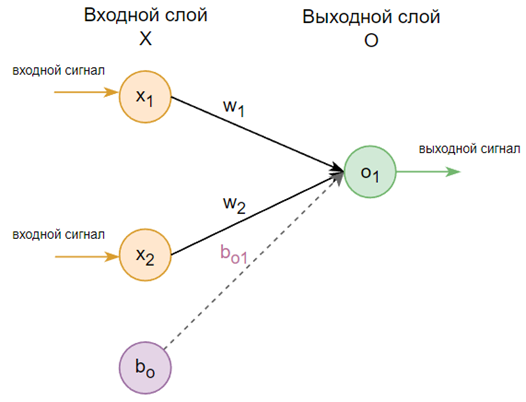

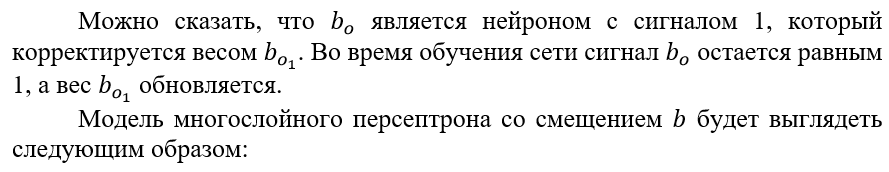

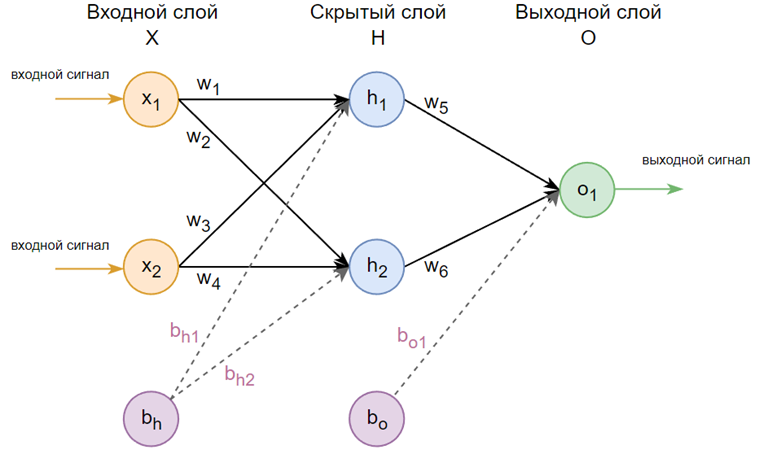

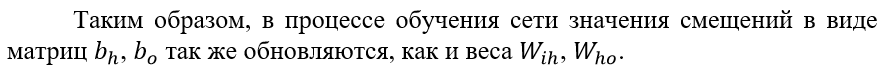

Дополнительную информацию см. в электронной книге «Dive into Deep Learning»: https://d2l.ai/chapter_multilayer-perceptrons/mlp.html

# Обучение нейронной сети

2.1. **Метод обратного распространения ошибки**

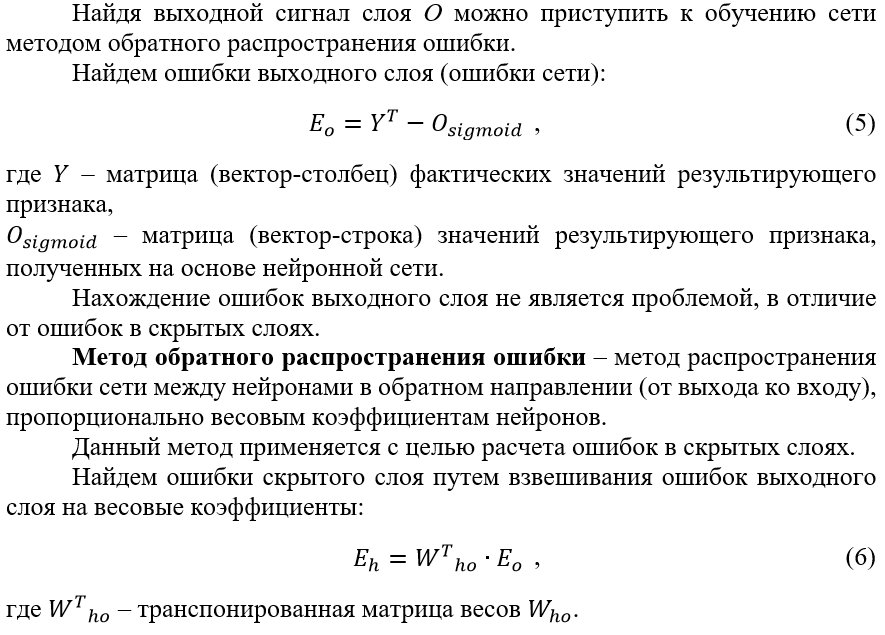

2.2. **Метод градиентного спуска**

Ошибки указывают на то, как должны быть изменены веса связей, чтобы улучшить результирующий общий ответ на выходе нейронной сети.

Как отрегулировать весовой коэффициент для связи между первым входным узлом и вторым узлом скрытого слоя, чтобы сигнал на выходе третьего узла увеличился, например, на 0,5?

*Метод грубой силы* – перебор случайных сочетаний весовых коэффициентов, пока не будет получен устраивающий результат. Такой подход не эффективен.

*Метод градиентного спуска* – метод нахождения минимума функции (сложной функции от большого числа переменных), даже не располагая знаниями свойств этой функции, достаточными для нахождения минимума математическими методами.

*Градиент* (от лат. gradiens, «шагающий, растущий») – вектор, своим направлением указывающий направление возрастания (а антиградиент – убывания) некоторой скалярной величины.

Функция выходного сигнала, а вместе с ней и функция ошибки зависят от множества весовых коэффициентов, которые часто исчисляются сотнями.

Иногда метод градиентного спуска может привести в ложную долину (к локальному минимуму), поскольку некоторые сложные функции имеют множество долин (множество локальных минимумов и только один глобальный минимум).

*Ложная долина* – это долина, которая не является самой глубокой.

2.3. **Функция ошибки**

Выходной сигнал нейронной сети представляет собой сложную, трудно поддающуюся описанию функцию со многими параметрами, весовыми коэффициентами связей, которые влияют на выходной сигнал.

Функция выходного сигнала сама по себе не является функцией ошибки. Но мы знаем, что можем легко превратить ее в таковую, поскольку ошибка – это разность между целевыми тренировочными значениями и выходными значениями.

Функция ошибки – функция, применяемая для расчета ошибки E.

**Виды функции ошибки:**

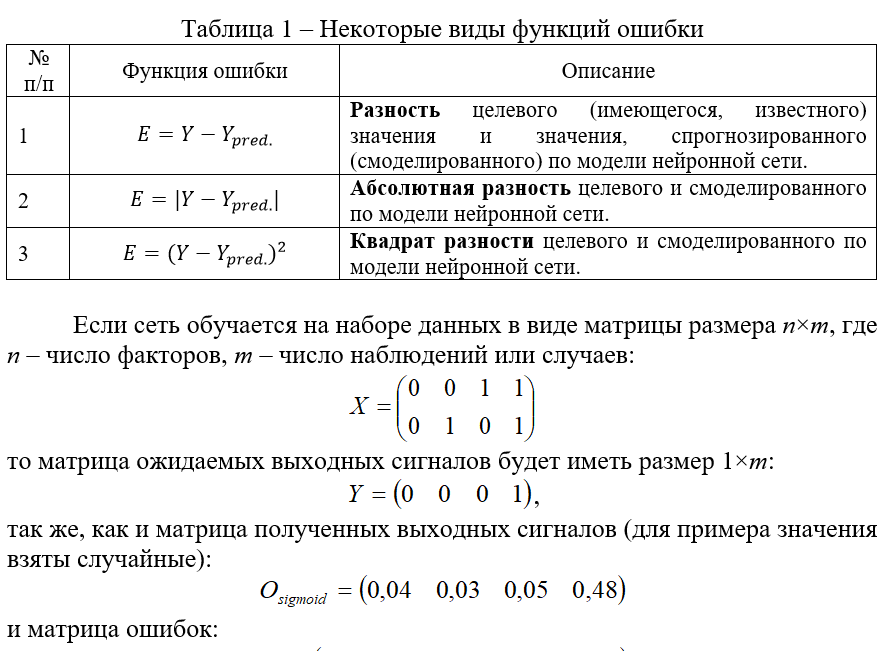

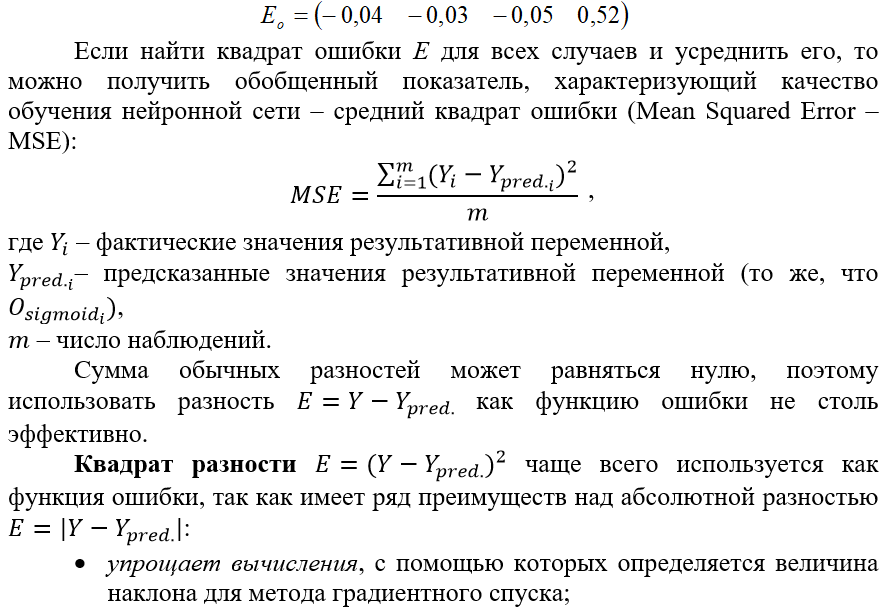

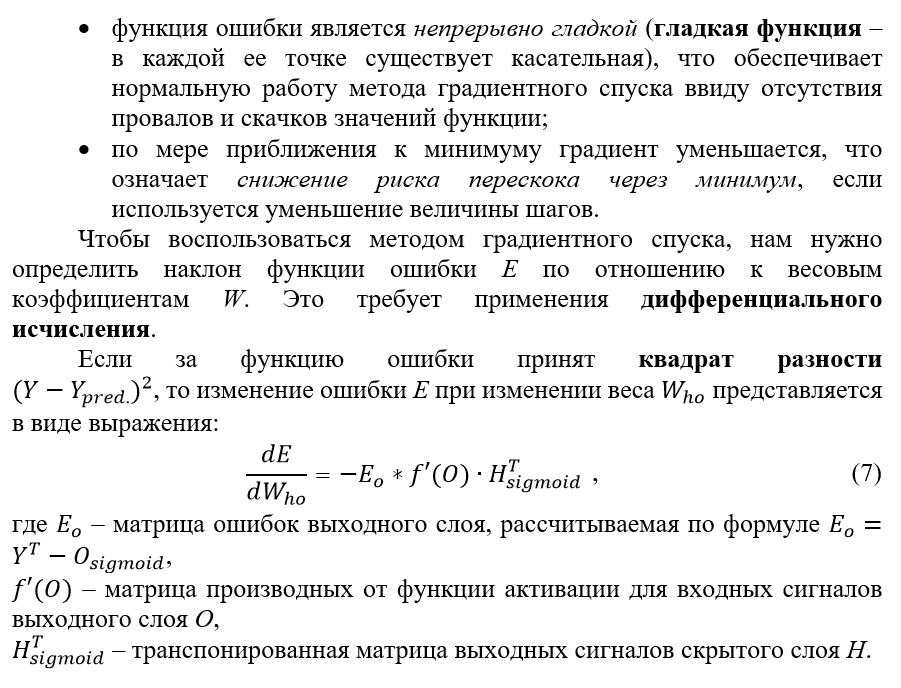

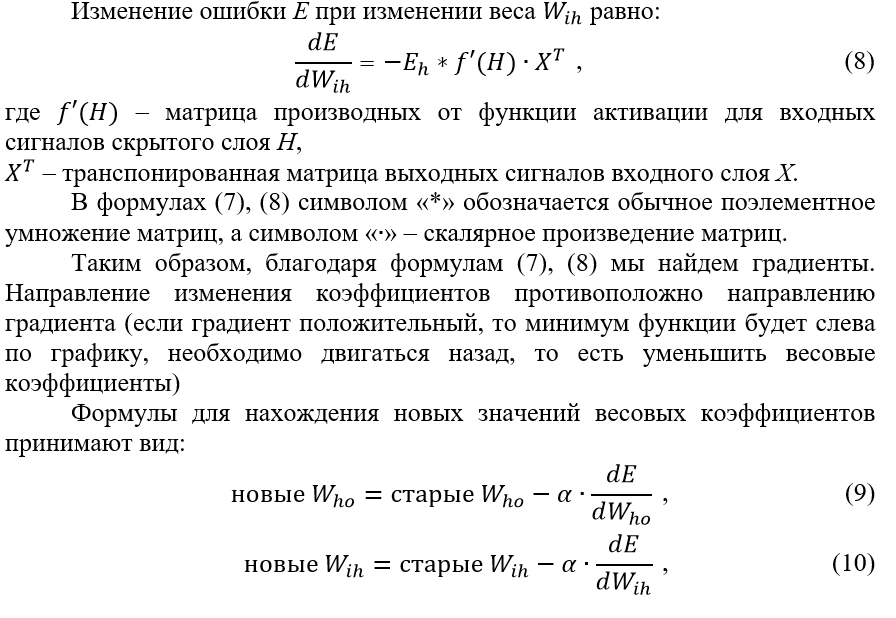

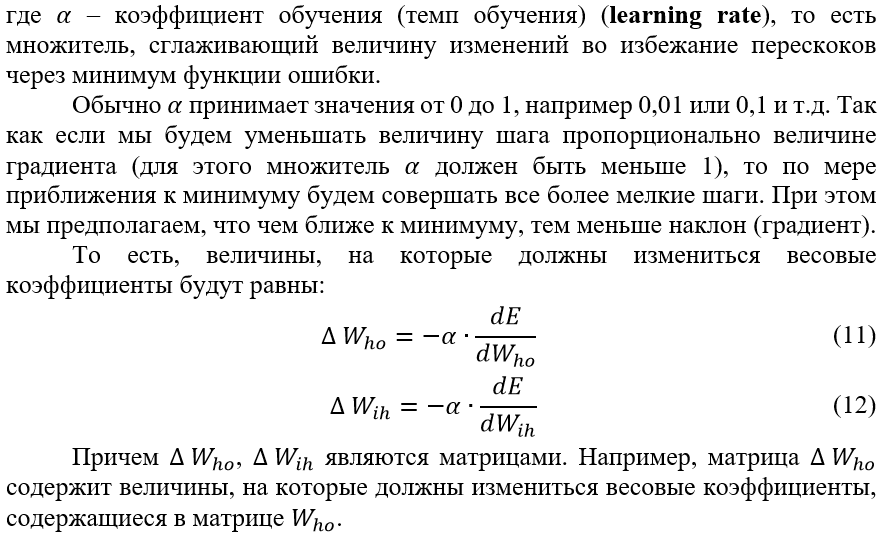

# Создание и обучения многослойного персептрона на Python

1. **Описание подготовленного набора данных**

Исследуем набор данных Mushroom Data Set, предназначенный для проведения бинарной классификации грибов. Набор данных включает 8124 наблюдений по 22 показателям. То есть каждое наблюдение представляет собой отдельный гриб, характеризующийся 22 показателями. Каждый показатель является качественным, то есть включает только буквенные обозначения. Каждый гриб классифицируется на 2 класса: ядовитый гриб (метка p) и неядовитый гриб (метка e).

Набор данных можно скачать с сайта школы Donald Bren School of Information and Computer Sciences: https://archive.ics.uci.edu/ml/datasets/Mushroom

2. **Импорт данных**

Для выполнения текущей работы необходимо подключить следующие библиотеки:

In [1]:
import pandas as pd

from sklearn.neural_network import MLPClassifier                  # Многослойный перцептрон
from sklearn.model_selection import train_test_split              # Разбивка на обуч. и тест. выборки
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score   # Метрики
from sklearn.metrics import classification_report, confusion_matrix                   # Сводка по классификации, матрица ошибок


In [2]:
data = pd.read_csv('/content/agaricus-lepiota3 (1).csv', sep = ';', header = 0)

In [3]:
data

,class,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
1,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
2,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1
3,0,5,3,9,1,0,1,0,0,5,...,2,2,7,7,2,1,4,2,2,1
4,0,0,2,8,1,0,1,0,0,2,...,2,2,7,7,2,1,4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8117,0,3,2,4,0,5,0,0,0,11,...,2,2,5,5,1,1,4,0,1,2
8118,0,5,2,4,0,5,0,0,0,11,...,2,2,5,5,0,1,4,0,4,2
8119,0,2,2,4,0,5,0,0,0,5,...,2,2,5,5,1,1,4,0,1,2
8120,1,3,3,4,0,8,1,0,1,0,...,2,1,7,7,2,1,0,7,4,2


In [4]:
Y = data.iloc[:, 0]
X = data.iloc[:, 1:]

3. **Разделение исходного набора на обучающий и тестовый**

Разделим набор данных на обучающую и тестовую выборки с помощью функции sklearn.model_selection.train_test_split(), принимающей в качестве параметров следующие основные аргументы:

•    *arrays – последовательность индексируемых элементов одинаковой длины (символ «*» используется для указания переменного числа аргументов),

•    *test_size* – размер тестовой выборки (от 0 до 1, где 1 – 100% от исходного набора данных),

•    *random_state* – случайное состояние (целое число). Используется, если необходимо одно и то же случайное разделение. Если random_state = None (изначальное значение), то при вызове функции разделения будут всегда разными.

Дополнительную информацию см. в документации: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

Разделим набор на обучающую выборку (80% изначальных строк) и тестовую выборку (20% оставшихся строк):

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

4. **Создание, обучение, тестирование модели многослойного персептрона**

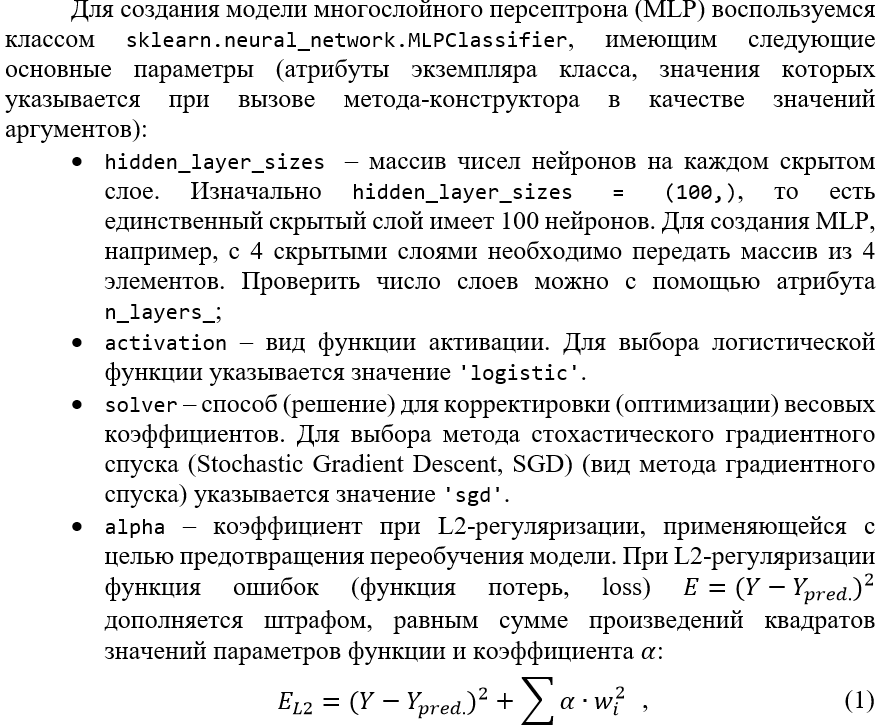

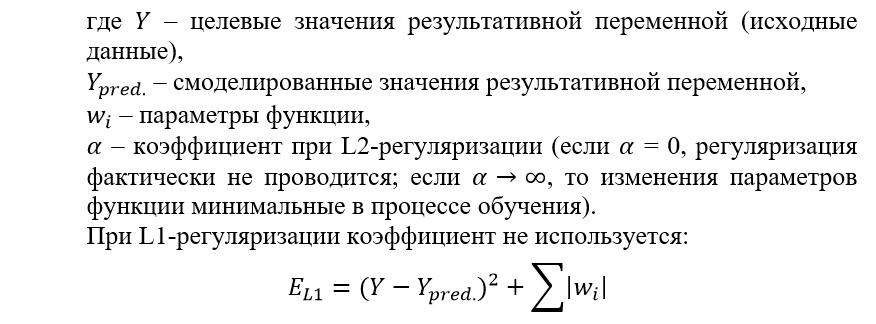

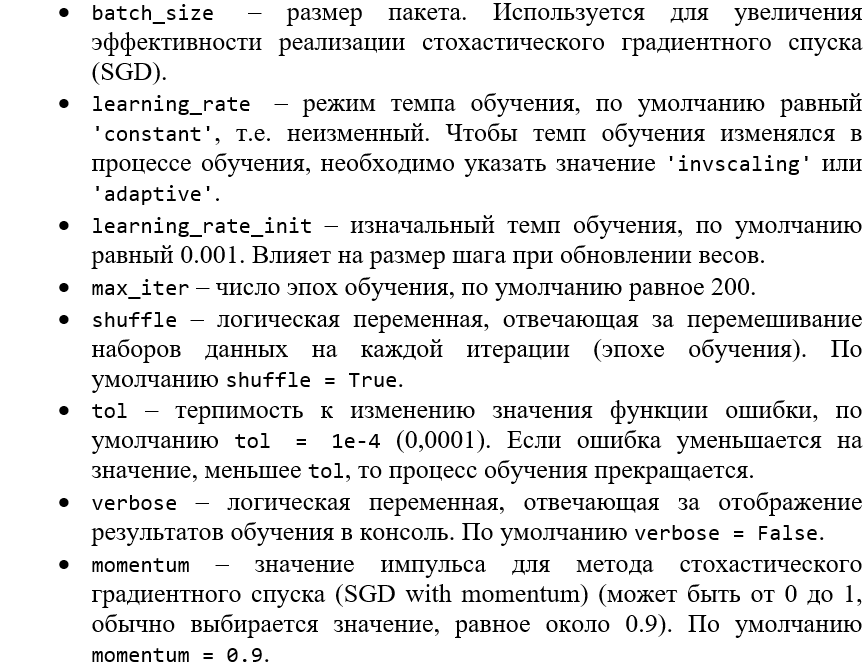

Дополнительную информацию см. в документации:
https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

Для подбора оптимальных параметров модели сети используется класс sklearn.model_selection.GridSearchCV:
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

Создадим, обучим и протестируем модель:

In [6]:
# Создание модели многослойного перцептрона

#Значение параметров модели
layers_hidden = 1       #Число скрытых слоев
nodes_hidden = 100      #Число нейронов в каждом слое
lerning_rate = 0.01     #Темп обучения
training_epochs = 30    #Число эпох обучения

# Число нейронов в каждо слое (список)
neurons_layers = [nodes_hidden] * layers_hidden # = [100]

# Создание модели
model = MLPClassifier(hidden_layer_sizes = neurons_layers,
                      activation = 'logistic',
                      solver = 'sgd',
                      alpha = 0,
                      batch_size = 'auto',
                      learning_rate_init = lerning_rate,
                      random_state = None,
                      max_iter = training_epochs,
                      verbose = True)

# Обучение модели
model = model.fit(X_train, Y_train)           # Заполнение данными

# Тестирование модели
Y_pred = model.predict(X_test)                # Итоговый ответ сети (0 или 1)
Y_pred_classes = model.predict_proba(X_test)  # Вероятности выбора метки класса

Iteration 1, loss = 0.66436310
Iteration 2, loss = 0.54389279
Iteration 3, loss = 0.47491648
Iteration 4, loss = 0.43465977
Iteration 5, loss = 0.40679494
Iteration 6, loss = 0.38697348
Iteration 7, loss = 0.37168071
Iteration 8, loss = 0.35724718
Iteration 9, loss = 0.34506093
Iteration 10, loss = 0.33366014
Iteration 11, loss = 0.32333834
Iteration 12, loss = 0.31416410
Iteration 13, loss = 0.30466162
Iteration 14, loss = 0.29593727
Iteration 15, loss = 0.28729949
Iteration 16, loss = 0.27964286
Iteration 17, loss = 0.27143405
Iteration 18, loss = 0.26379333
Iteration 19, loss = 0.25713528
Iteration 20, loss = 0.24952982
Iteration 21, loss = 0.24244200
Iteration 22, loss = 0.23646362
Iteration 23, loss = 0.22956657
Iteration 24, loss = 0.22329531
Iteration 25, loss = 0.21733994
Iteration 26, loss = 0.21097011
Iteration 27, loss = 0.20446765
Iteration 28, loss = 0.19872792
Iteration 29, loss = 0.19306597
Iteration 30, loss = 0.18803585


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


In [7]:
Y_pred

array([0, 1, 1, ..., 0, 0, 1])

In [8]:
Y_pred_classes

array([[0.94306273, 0.05693727],
       [0.17926091, 0.82073909],
       [0.02008694, 0.97991306],
       ...,
       [0.87332536, 0.12667464],
       [0.95269407, 0.04730593],
       [0.16020248, 0.83979752]])

Создадим таблицу с ожидаемыми значениями результативной переменной (Y_test) и ответами сети:

In [9]:
# Таблица ответов сети
columns_names = ['Y_test', 'Y_pred', 'Y_pred (class = 0)', 'Y_pred (class = 1)']
data_pred = list(zip(Y_test,
                     Y_pred,
                     Y_pred_classes[:, 0],
                     Y_pred_classes[:, 1]))

df_pred = pd.DataFrame(data = data_pred, columns = columns_names)

In [10]:
df_pred

,Y_test,Y_pred,Y_pred (class = 0),Y_pred (class = 1)
0,0,0,0.943063,0.056937
1,1,1,0.179261,0.820739
2,1,1,0.020087,0.979913
3,1,1,0.022510,0.977490
4,0,0,0.711093,0.288907
...,...,...,...,...
1620,1,1,0.013688,0.986312
1621,1,1,0.447906,0.552094
1622,1,0,0.873325,0.126675
1623,0,0,0.952694,0.047306


Первый столбец (Y_test) содержит исходные значения Y в тестовом наборе, второй столбец – значения Y, смоделированные нейронной сетью (итоговый ответ сети), третий столбец содержит вероятности того, что объект относится к классу 0, четвертый столбец – вероятности того, что объект относится к классу 1.

Например, для записи 341 нейронная сеть уверена в том, что такие значения признаков соответствуют неядовитому грибу (вероятность того, что гриб относится к классу 0 равна 0,8955). Для записи 346 вероятность принадлежности гриба к классу 0 уже существенно ниже.

Также мы можем видеть, что для записи 344 сеть ошиблась и выдала неправильный ответ.

5. **Проверка параметров обученной модели**

Чтобы посмотреть параметры обученной модели обратимся к атрибутам экземпляра model класса MLPClassifier.

Класс MLPClassifier имеет следующие основные атрибуты:

•    *classes_* – метки классов.

•    *loss_* – значение функции ошибок (функции потерь) на последней итерации обучения.

•    *loss_curve_* – список значений функции ошибок на каждой итерации обучения.

•    *coefs_* – список матриц весовых коэффициентов (W). Для MLP с 1 скрытым слоем coefs_ будет содержать 2 матрицы: Wih – весовые коэффициенты между входным (input) и скрытым (hidden) слоем, Who – весовые коэффициенты между скрытым (hidden) и выходным (output) слоем.

•    *intercepts_* – список матриц условных начал (смещений) (B). Для MLP с 1 скрытым слоем intercepts_ будет содержать 2 матрицы: Bih – смещения между входным и скрытым слоем, Bho – смещения между скрытым и выходным слоем.

•    *n_features_in_* – число признаков (факторов).

•    *n_iter_* – число эпох обучения;

•    *n_layers_* – число слоев,

•    *n_outputs_* – число нейронов в выходном слое. Для бинарной классификации n_outputs_ = 1. Для мультиклассовой классификации n_outputs_ равно числу меток (числу классов).

•    *out_activation_* – имя функции активации в выходном слое.

Проверим параметры модели после завершения процесса обучения:

In [15]:
# Проверка параметров модели после обучения
print('\nclasses:', model.classes_)                               # Классы
print('loss = ', model.loss_)                                     # Значение функции ошибок
print('loss_curve:', model.loss_curve_[0], model.loss_curve_[-1]) # Ошибки (последняя итерация и первая)
print('n_features_in_ = ', model.n_features_in_)                  # Значение функции ошибок
print('n_iter_ = ', model.n_iter_)                                # Число эпох обучения
print('n_layers_ =', model.n_layers_)                             # Число слоев
print('n_outputs_ = ', model.n_outputs_)                          # Число нейронов в выходном слое
print('out_activation_ = ', model.activation)                      # Функция активации в выходном слое

W = model.coefs_                                    # Список матриц весовых коэффициентов W
b = model.intercepts_                               # Список сатриц смещений (bias) b


classes: [0 1]
loss =  0.18803585057148214
loss_curve: 0.6643630970820127 0.18803585057148214
n_features_in_ =  21
n_iter_ =  30
n_layers_ = 3
n_outputs_ =  1
out_activation_ =  logistic


По полученной информации видно, что модель обучалась присваивать объектам метки классов «0» и «1», при этом каждый объект характеризовался 21 признаком. Значение функции ошибок (loss) на первой итерации обучения было равно 0,452, а на последней (итерация 30) снизилось до 0,026. Модель имеет 3 слоя, выходной слой состоит из 1 нейрона, имеющего логистическую функцию активации.

Списки матриц W и b содержат по 2 матрицы:

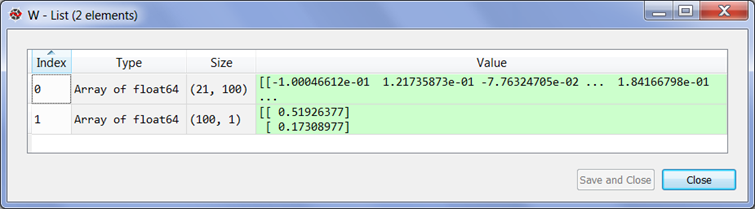

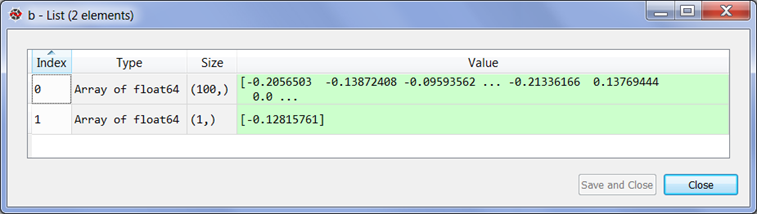

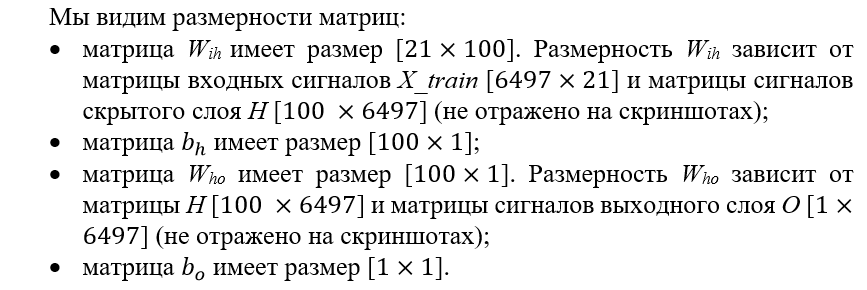

6. **Оценка качества модели**

Рассчитаем метрики для оценки качества построенной модели:

In [24]:
# Оценка качества модели
accuracy_train = model.score(X_train, Y_train)
accuracy_test = model.score(X_test, Y_test)

print('accuracy_train', accuracy_train)
print('accuracy_test', accuracy_test)

# Матрица ошибок
cm = confusion_matrix(y_true = Y_test, y_pred = Y_pred)

accuracy = accuracy_score(y_true = Y_test, y_pred = Y_pred)
precision = precision_score(y_true = Y_test, y_pred = Y_pred)
recall = recall_score(y_true = Y_test, y_pred = Y_pred)
f1 = f1_score(y_true = Y_test, y_pred = Y_pred)
cp = classification_report(y_true = Y_test, y_pred = Y_pred)

# Таблица результатов
metrics_names = ['accuracy', 'precision', 'recall', 'f1']
metrics_values = [accuracy, precision, recall, f1]
models_names = ['model 1']

df_res = pd.DataFrame()
for i in range(len(metrics_names)):
                   df_res[metrics_names[i]] = [metrics_values[i]]
df_res.index = models_names

accuracy_train 0.933969524395875
accuracy_test 0.9292307692307692


Матрица ошибок имеет вид:

In [25]:
cm

array([[788,  38],
       [ 77, 722]])

Таблица со значениями метрик выглядит следующим образом:

In [26]:
df_res

,accuracy,precision,recall,f1
model 1,0.929231,0.95,0.90363,0.926235
